# CIA 3: 9/9/25

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv(r"E:\AIML College\CIA 3\data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.nunique() #Checking for unique values in each column

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(1025, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

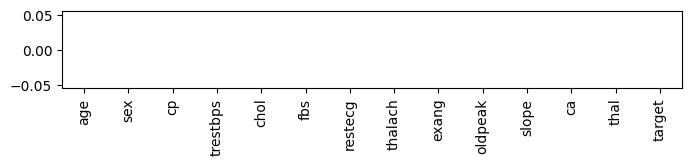

In [10]:
df.isnull().sum().plot(kind="bar", figsize=(8,1)) #Checking null values
#No null values found

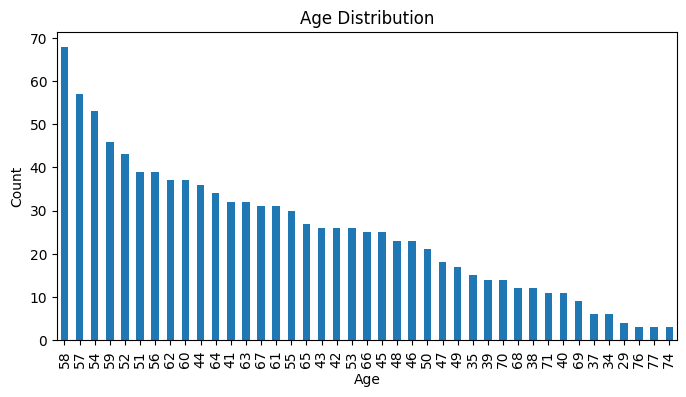

In [25]:
# Graph 1 
df["age"].value_counts().plot(kind="bar", figsize=(8,4)) #Age distribution
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

<Figure size 1000x800 with 0 Axes>

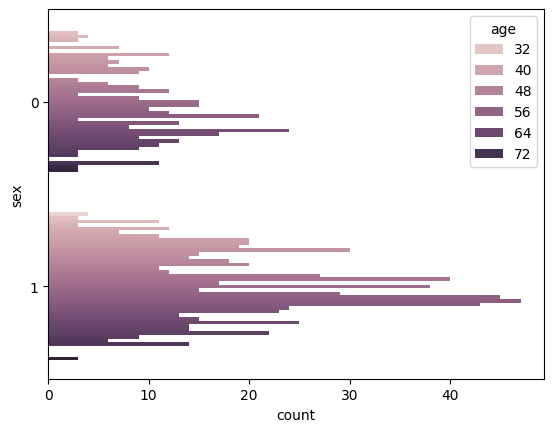

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Graph 2
# For counting sex based on age (0 and 1) 
sns.countplot(data=df, y="sex", hue="age")
plt.figure(figsize=(10,8)) 

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

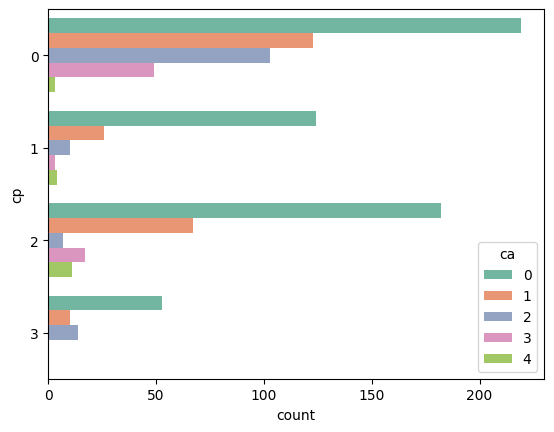

<Figure size 1000x800 with 0 Axes>

In [35]:
# Graph 3
sns.countplot(data=df, y="cp", hue="ca", palette="Set2") # Chart to see cp vs ca comparison
plt.figure(figsize=(10,8))

<Axes: xlabel='thal', ylabel='exang'>

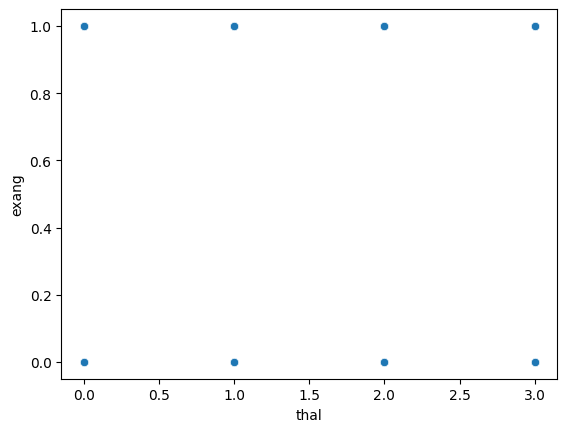

In [26]:
# Graph 4
sns.scatterplot(data=df, y="exang", x="thal")

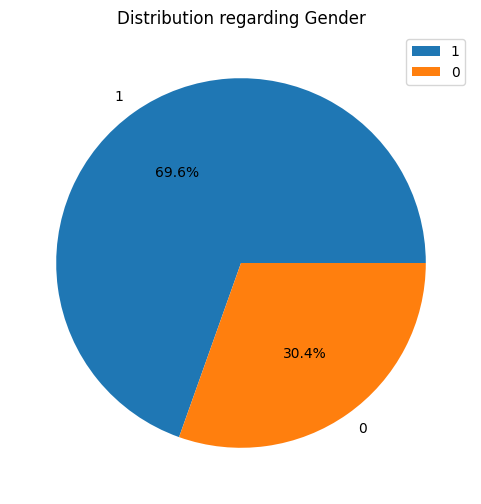

In [31]:
# Graph 5
df["sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Distribution regarding Gender")
plt.ylabel("")
plt.legend()
plt.show()

In [32]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [33]:
df[["trestbps", "chol", "thalach", "oldpeak"]].describe() #Descriptive statistics of numerical columns

,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.00000,1025.000000,1025.000000
mean,131.611707,246.00000,149.114146,1.071512
std,17.516718,51.59251,23.005724,1.175053
min,94.000000,126.00000,71.000000,0.000000
25%,120.000000,211.00000,132.000000,0.000000
50%,130.000000,240.00000,152.000000,0.800000
75%,140.000000,275.00000,166.000000,1.800000
max,200.000000,564.00000,202.000000,6.200000


In [34]:
df[["trestbps", "thalach"]].head(10)

,trestbps,thalach
0,125,168
1,140,155
2,145,125
3,148,161
4,138,106
5,100,122
6,114,140
7,160,145
8,120,144
9,122,116


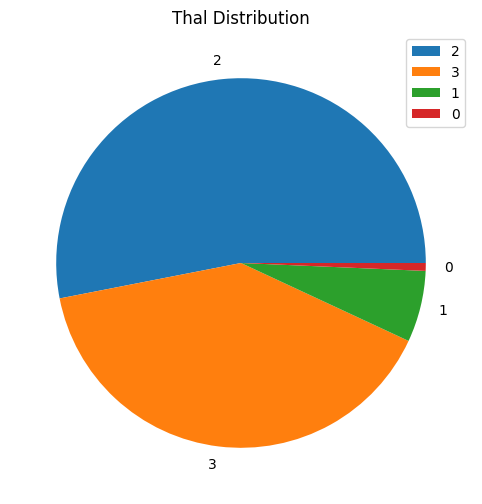

In [45]:
# Graph 6
df["thal"].value_counts().plot(kind="pie", figsize=(8,6))
plt.title("Thal Distribution")
plt.ylabel("")
plt.legend()
plt.show()